# Example 4 a-  Fitting H2O:Silicate areas in glasses
- This notebook shows how to quantify the relative area of the silicate peak and H2O peak in glasses
- Please see example 4b if you want to quantify H2O/silicate areas in unexposed olivine-hosted melt inclusions
- This folder lets you fit one spectra at a time - this is best if you need to adjust the fits for each spectra. It saves each fit to a CSV, then you go to the end of the notebook and stitch these all together into 1 file. 
- There is also an example coming soon for looping through all spectra using the same fit parameters

## Import necessary python things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.85'

### Install DiadFit if you havent already- uncomment this!

In [3]:
#!pip install --upgrade DiadFit

In [4]:
import os
DayFolder=os.getcwd()
spectra_path=DayFolder
file_ext='.txt'
filetype='headless_txt'

In [5]:
H2O_Files=pf.get_files(path=spectra_path,
file_ext=file_ext, sort=False)
H2O_Files

['ETFS_OL39_MI7_50X_GLASS.txt', 'test_H2O.txt']

### Select file
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
- Come back to here and change the i value

In [6]:
print('max i value='+str(len(H2O_Files)-1))

max i value=1


In [7]:
i=0
filename_H2O=H2O_Files[i]
print(filename_H2O)

ETFS_OL39_MI7_50X_GLASS.txt


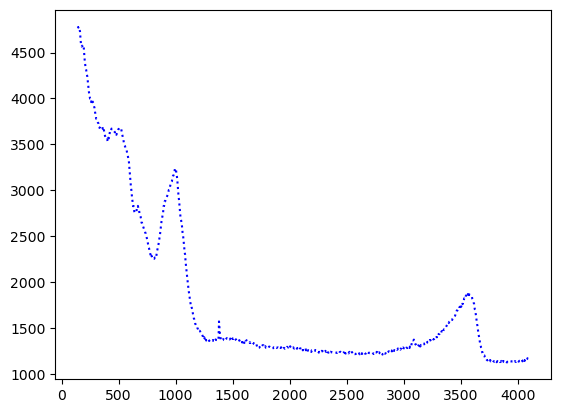

In [8]:
# Plot the spectra from the glass sapmle collected by Raman
spectra_H2O=pf.get_data(path=spectra_path, filename=filename_H2O,
            Diad_files=None, filetype=filetype)
plt.plot(spectra_H2O[:, 0], spectra_H2O[:,1], ':b')

## Now lets quantify the area under the silicate region

In [9]:
# We have stored default fit parameters, you can see them here
pf.sil_bck_pos_Schiavi_basalt()

sil_bck_pos_Schiavi_basalt(lower_range_sil=(300, 340), mid_range1_sil=(630, 640), mid_range2_sil=(800, 830), upper_range_sil=(1200, 1250), LW=(400, 600), HW=(800, 1200), N_poly_sil=3, sigma_sil=5)

In [26]:
# You can edit any of them by writing the variable name between these brackets, and entering new numbers that might work better for your system
config_silicate=pf.sil_bck_pos_Schiavi_basalt(lower_range_sil=(200,300), mid_range1_sil=(635, 645), mid_range2_sil=(800, 810),upper_range_sil=(1220, 2200),
     N_poly_sil=12, LW=(400, 600), HW=(800, 1200))
config_silicate

# mid_range2_sil=(790, 800)

sil_bck_pos_Schiavi_basalt(lower_range_sil=(200, 300), mid_range1_sil=(635, 645), mid_range2_sil=(800, 810), upper_range_sil=(1220, 2200), LW=(400, 600), HW=(800, 1200), N_poly_sil=12, sigma_sil=5)

,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,Silicate_RHS_Back2,Silicate_N_Poly,Silicate_Trapezoid_Area,Silicate_Simpson_Area,LW_Silicate_Trapezoid_Area,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area
0,200,300,1220,2200,12,376749.741113,376898.798086,61507.444496,61445.647136,61507.444496,61445.647136,9500.171301,9653.787661


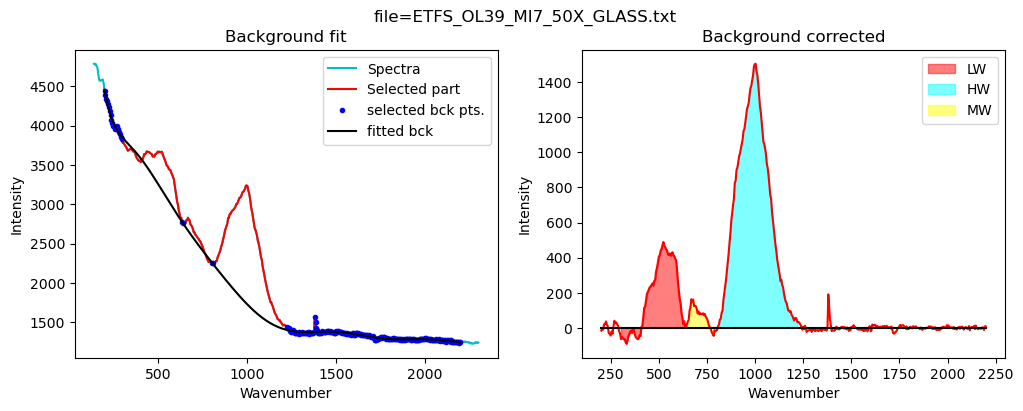

In [27]:
# This cell calculates the area under the 3 different silicate regions
df_sil=pf.fit_area_for_silicate_region(Spectra=spectra_H2O, 
path=spectra_path, filename=filename_H2O, config1=config_silicate,
exclude_range1_sil=None, exclude_range2_sil=None,  plot_figure=True,
fit_sil='poly')
df_sil

## Now quantify the area under the water region

In [28]:
# Again, there is a default set of variables
pf.water_bck_pos()

water_bck_pos(fit_water='poly', N_poly_water=3, lower_bck_water=(2750, 3100), upper_bck_water=(3750, 4100))

water_bck_pos(fit_water='poly', N_poly_water=3, lower_bck_water=(2500, 2750), upper_bck_water=(3750, 4100))


,Water Filename,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly,Water_Trapezoid_Area,Water_Simpson_Area
0,ETFS_OL39_MI7_50X_GLASS.txt,2500,2750,3750,4100,3,274807.39519,274611.003728


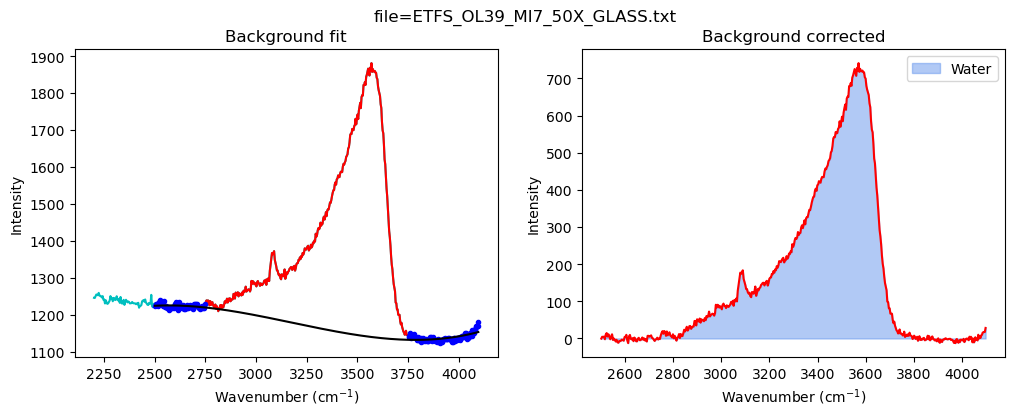

In [29]:
# And you can edit any of these values here - we are tweaking the lower background
config_H2O=pf.water_bck_pos(lower_bck_water=(2500, 2750))
print(config_H2O)

df_H2O=pf.fit_area_for_water_region(
path=spectra_path, filename=filename_H2O,
Spectra=spectra_H2O,
config1=config_H2O)
df_H2O

In [30]:
# This combines the outputs you got from silicate fitting and H2O fitting.
combo_out=pf.stitch_dataframes_together(df_sil=df_sil, df_water=df_H2O, 
MI_file=filename_H2O, save_csv=True, path=DayFolder)
combo_out

,MI filename,HW:LW_Trapezoid,HW:LW_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,...,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area,Water Filename,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,ETFS_OL39_MI7_50X_GLASS.txt,4.467872,4.469169,274807.39519,274611.003728,376749.741113,376898.798086,200,300,1220,...,61507.444496,61445.647136,9500.171301,9653.787661,ETFS_OL39_MI7_50X_GLASS.txt,2500,2750,3750,4100,3


In [33]:
combo_out['Water_Simpson_Area']/combo_out['Silicate_Simpson_Area']

0    0.728607
dtype: float64

In [34]:
combo_out['Water_Trapezoid_Area']/combo_out['Silicate_Trapezoid_Area']

0    0.729416
dtype: float64

### You have fitted one file - Now click this to go back to the top and do the next file and so on by changing i

[Select file](#Select-file)

## Once you've fitted all your files...
- Now stitch them, this code works by finding Stitching all the files together once you have them

In [14]:
csv_files2=pf.get_files(path=DayFolder, ID_str='combo_fit',
    sort=True, file_ext='csv')
csv_files2

['ETFS_OL39_MI7_50X_GLASS_combo_fit.csv']

### Stitch data from all these CSVs together

In [15]:
df = pd.concat(
    map(pd.read_csv, csv_files2), ignore_index=True)
df

,Unnamed: 0,MI filename,HW:LW_Trapezoid,HW:LW_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,...,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area,Water Filename,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,0,ETFS_OL39_MI7_50X_GLASS.txt,3.928982,3.928359,274807.39519,274611.003728,362558.10011,362562.401959,300,340,...,69943.66401,69904.770625,11333.332933,11342.729097,ETFS_OL39_MI7_50X_GLASS.txt,2500,2750,3750,4100,3


### Now save to Excel

In [16]:
df.to_excel('H2O_Silicate_areas.xlsx')